# MNIST

---

## 1. Theory

- Make sure you understand the second video of 3Blue1Brown's introduction to neural nets, and ask questions if there's anything unclear.

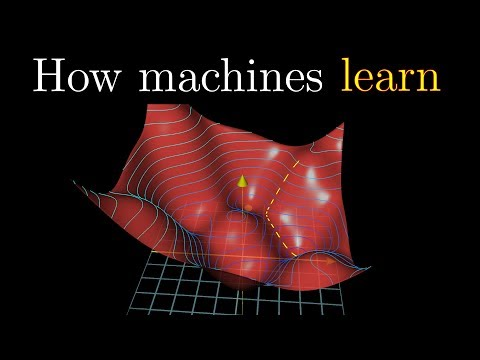

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('IHZwWFHWa-w', width=853, height=480) # 3Blue1Brown 2

---


## 2. Practice

- Add a text cell and comment on network training and test accuracy;
- Train for 20 epochs and evaluate. Comment on your findings;
- The first layer transforms the 784-element image vector to a 512 dimensional intermediate representation Experiment with different intermediate dimensions. Make a markdown table of network performance on the test set for varying intermediate dimension. Comment on your results;
- Replace network compilation with:
```
from tensorflow.keras import optimizers
network.compile(
    optimizer=optimizers.RMSprop(lr=0.001, momentum=0.0),
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
```
The code is exactly equivalent, but we are now able to adjust learning rate and momentum. `lr=0.001` is the default value: experiment with different learning rates. Tabulate your results and interpret.
- Experiment with different momentums. Tabulate and interpret.

In [ ]:
# MNIST

# load
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# preprocess
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# build
from tensorflow.keras import models, layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# train
network.fit(train_images, train_labels, epochs=5, batch_size=128)

In [ ]:
# evaluate on the test set
test_loss, test_acc = network.evaluate(test_images, test_labels)

---

You can save and reload your model like so:

In [ ]:
network.save("dense.mnist.keras")

In [ ]:
from tensorflow import keras
network_reloaded = keras.models.load_model("dense.mnist.keras")

It is possible to call `fit()` on the loaded model and continue training.

In [ ]:
network_reloaded.fit(train_images, train_labels, epochs=5, batch_size=128)

---

## 3. Reminder

Check out the numerical dojo if you haven't done so:
- #### [Numerical dojo!](https://drive.google.com/file/d/1IPCbxDB4k33GG1i-Md85KMhzdFqe-NWt/view?usp=sharing)
- #### [Accompanying quiz](https://drive.google.com/file/d/1xJ-A7PG0pU5S_gTuH2RmuEqTq6orLI-3/view?usp=sharing)